# ЛАБОРАТОРНАЯ РАБОТА 1
### ПОСТРОЕНИЕ И ИССЛЕДОВАНИЕ ХАРАКТЕРИСТИК ДАТЧИКОВ БАЗОВЫХ СЛУЧАЙНЫХ ВЕЛИЧИН

In [1]:
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
import sys
#np.random.seed(42)

# Метод середины квадрата
Метод середины квадрата предложен для получения псевдослучайных
чисел Д. фон Нейманом в 1946 г. Вот один из вариантов этого метода.
1. Возьмем произвольное 4-значное число.
2. Возведем полученное число в квадрат и, если необходимо,
добавим к результату слева нули до 8-значного числа.
3. Возьмем четыре цифры из середины 8-значного в качестве нового
случайного 4-значного числа.
4. Если нужны еще случайные числа, то перейдем к 2. 

In [2]:
def middleSquareMethod(n = 100):
    middle_square_arr = np.zeros((n))
    random_var = np.random.randint(1000,9999)
    
    for i in range(n):
        square_var = np.power(random_var,2)
        if len(str(square_var)) < 8:
            square_var = (8 - len(str(square_var))) * '0' + str(square_var)
        buffer = str(square_var)
        middle_square_arr[i] = int(buffer[2:6])/10000
        random_var = (int(buffer[2:6]))
    #print(middle_square_arr)
    return middle_square_arr

------
# Мультипликативный конгруэнтный метод

Так называемый мультипликативный конгруэнтный датчик БСВ задается
двумя параметрами: модулем m и множителем k. Обычно это достаточно
большие целые числа.
При заданных m, k числа z1, z2, ..., вычиcляются по рекуррентной формуле:
Ai = (kAi -1) mod m, i = 1, 2,...,
zi = Ai / m,
где m − модуль, k − множитель, A0 − начальное значение, mod − операция
вычисления остатка от деления kAi -1 на m.  
Таким образом, A1 определяется как остаток от деления kA0 на m; A2 -
как остаток от деления kA1 на m и т.д. Поскольку все числа Ai − это остатки от
деления на m, то 0 ≤ Ai < m. Разделив последнее неравенство на m, видим, что
0 ≤ Ai / m< 1, т. е. 0 ≤ zi <1.

In [3]:
def multiplicativeCongruentMethod(n = 100, m = 1117, k = 1113, A = 7):
    mm_arr = np.zeros((int(n)))
    for i in range(n):
        A = np.mod(k*A,m)
        mm_arr[i] = A
    mm_arr = np.divide(mm_arr,np.amax(mm_arr))
    #print(mm_arr)
    return mm_arr

---
# Тестирование равномерности

1. Разобьем интервал (0,1) на K равных отрезков (например, K = 10).
2. Сгенерируем n чисел z1,..., zn с помощью тестируемого датчика БСВ
(например, n = 100).
3. Подсчитаем, сколько чисел попало в каждый из k отрезков, т.е. найдем
числа попаданий n1,...,nk. 
4. Рассчитаем относительные частоты попаданий в отрезки:
5. Построим гистограмму частот на K отрезках интервала (0,1).
6. Повторим действия (2) − (5) для большего значения n (например, для n
=10 000).
7. Оценим по полученным гистограммам сходимость каждой частоты
к вероятности p = 1/K того, что БСВ попадет в i-й отрезок. Согласно
закону больших чисел должно быть

In [4]:
def histDataPreparation(n, arr, step = 10):
    interval_number = 0
    intervals = np.arange(0, 1.1, 1/(step))
    intervals_stat = np.zeros((step))
    arr_sorted = np.sort(arr)
    
    for counter in range(n):

        if interval_number < step - 1:
            if arr_sorted[counter] >= intervals[interval_number + 1]:
                #while (mm_method[counter] > intervals[interval_number]) and (interval_number < step - 1 ):
                interval_number += 1
                intervals_stat[interval_number] += 1
                continue
        else:
            intervals_stat[interval_number] += n - counter
            break

        if arr_sorted[counter] == intervals[interval_number]:
            intervals_stat[interval_number] += 0.5
            if interval_number > 0:
                intervals_stat[interval_number - 1] += 0.5
        elif (arr_sorted[counter] > intervals[interval_number]) and (arr_sorted[counter] < intervals[interval_number + 1]):
            intervals_stat[interval_number] += 1
        else:
            print("smth got wrong",  mm_method[counter], interval_number, intervals[interval_number])
            #wtf_counter +=1
            
    return intervals, intervals_stat

In [5]:
def buildHistogram(intervals_stat, step):
    x = np.arange(0.1, 1.1, 1/(step))
    width = 0.08
    _, ax = plt.subplots(figsize=(15,5))
    rects1 = ax.bar(x - width/2, intervals_stat, width, label="frequency")

    #ax.set_ylabel('cm')
    ax.set_xticks(x)
    ax.legend()
    plt.show()
    

In [6]:
def uniformityTesting(n,arr,intervals_stat, step):
    convergence_of_frequency = np.divide(intervals_stat, step)
    expected_value = 1/n * (np.sum(arr))
    dispersion = 1/n *np.sum((np.power(arr,2) - np.power(expected_value, 2)))
    print("expected_value", expected_value, "dispersion", dispersion)
    
    print("reference frequency", 1/step)
    print("intervals frequence", np.divide(intervals_stat,n))
    return expected_value, dispersion

# Тестирование независимости
Простейшую проверку статистической независимости реализаций z1, z2, ...,
можно осуществить, оценивая корреляцию между числами zi и zi+ s,
отстоящими друг от друга на шаг s >1.  
Для вывода формулы, по которой можно рассчитать коэффициент
корреляции чисел zi и zi+ s , рассмотрим две произвольные СВ x, y.
Коэффициент корреляции определяется для них формулой: 

In [7]:
def shift(arr, num, fill_value=np.nan):
    result = np.empty_like(arr)
    if num > 0:
        result[:num] = fill_value
        result[num:] = arr[:-num]
    elif num < 0:
        result[num:] = fill_value
        result[:num] = arr[-num:]
    else:
        result = arr

    n = len(arr)
    for i in range(num - 1, 0, -1):
        result[i] = arr[n - i -1]
    result[0] = arr[-1]
    return result

In [8]:
def correlationCalculating(arr, expected_value, dispersion, correlation_check_step=10):
    shifted_array = shift(arr, correlation_check_step)

    numerator = np.sum(arr - expected_value) * np.sum(shifted_array - expected_value)
    denominator = np.sqrt( np.power(np.sum(arr - expected_value), 2) * np.power(np.sum(shifted_array - expected_value),2))

    correlation = np.divide(numerator,denominator)
    #print(numerator,denominator )
    print("correlation", correlation)

# Lab itself
It's time to call all functions step by step to see what we get

In [9]:
n = 500
mm_arr = multiplicativeCongruentMethod(n)
np.sort(mm_arr)

array([0.00358423, 0.00358423, 0.0062724 , 0.00896057, 0.00896057,
       0.01075269, 0.01075269, 0.0188172 , 0.01971326, 0.01971326,
       0.02060932, 0.02060932, 0.02240143, 0.02240143, 0.02688172,
       0.02688172, 0.03225806, 0.03225806, 0.03315412, 0.03315412,
       0.0421147 , 0.0421147 , 0.04659498, 0.04659498, 0.04749104,
       0.04749104, 0.04928315, 0.04928315, 0.05645161, 0.05734767,
       0.05734767, 0.05913978, 0.05913978, 0.06182796, 0.06182796,
       0.0672043 , 0.0672043 , 0.07437276, 0.07437276, 0.08064516,
       0.08064516, 0.08154122, 0.08154122, 0.09050179, 0.09050179,
       0.09587814, 0.09677419, 0.09677419, 0.09946237, 0.09946237,
       0.10035842, 0.10035842, 0.10125448, 0.10125448, 0.10842294,
       0.10842294, 0.11111111, 0.11111111, 0.11648746, 0.1218638 ,
       0.12634409, 0.12634409, 0.13620072, 0.13620072, 0.13978495,
       0.13978495, 0.14247312, 0.14247312, 0.14336918, 0.14336918,
       0.14695341, 0.14784946, 0.14784946, 0.16935484, 0.17114

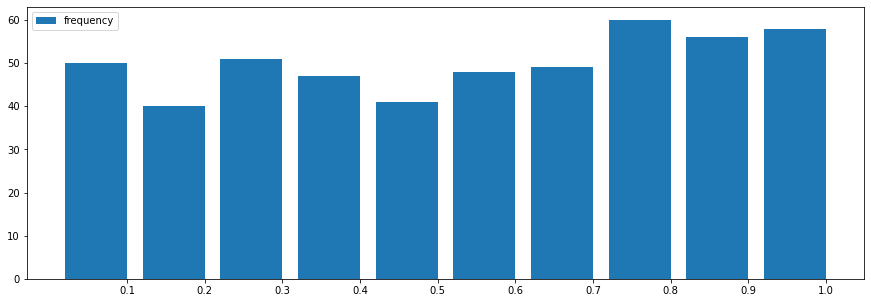

In [10]:
step = 10
%matplotlib inline 
intervals, intervals_stat = histDataPreparation(n, mm_arr, step)
buildHistogram(intervals_stat, step)

In [11]:
expected_value, dispersion = uniformityTesting(n, mm_arr,intervals_stat, step)

expected_value 0.5228727598566308 dispersion 0.0866318660185506
reference frequency 0.1
intervals frequence [0.1   0.08  0.102 0.094 0.082 0.096 0.098 0.12  0.112 0.116]


In [12]:
correlation_check_step=55
correlationCalculating(mm_arr, expected_value, dispersion, correlation_check_step)

correlation 1.0


In [13]:
shifted_array = shift(mm_arr, correlation_check_step)  #correlation double checke in case of any mictaces in my code 
np.corrcoef(mm_arr, shifted_array)  # seems everything is fine

array([[1.        , 0.00920638],
       [0.00920638, 1.        ]])

# Testing

Now lets test generator with different n for *Multiplicative Congruent Method*

In [14]:
def lab1(n, arr):
    arr_sorted = np.sort(arr)
    step = 10
    intervals, intervals_stat = histDataPreparation(n, arr_sorted, step)
    buildHistogram(intervals_stat, step)
    expected_value, dispersion = uniformityTesting(n, arr,intervals_stat, step)
    correlation_check_step= int(n/2)
    correlationCalculating(arr, expected_value, dispersion, correlation_check_step)


n = 10


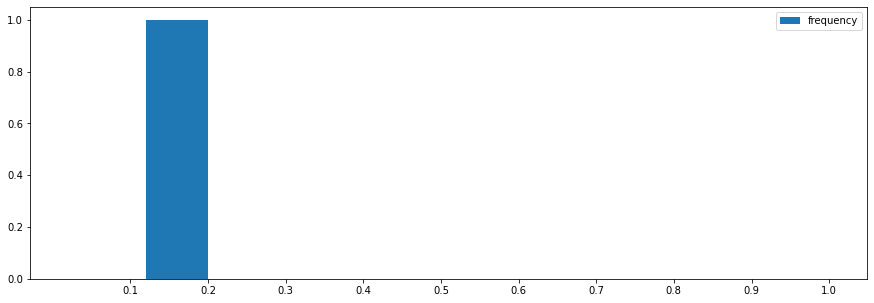

expected_value 1.0 dispersion 0.0
reference frequency 0.1
intervals frequence [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
correlation nan

n = 1


C:\Program Files\Anaconda\envs\ML_book_OR\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


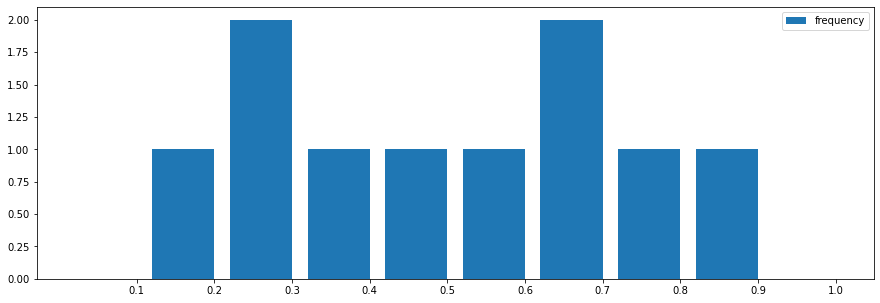

expected_value 0.508356290174472 dispersion 0.07271803096496308
reference frequency 0.1
intervals frequence [0.  0.1 0.2 0.1 0.1 0.1 0.2 0.1 0.1 0. ]
correlation 1.0

n = 10


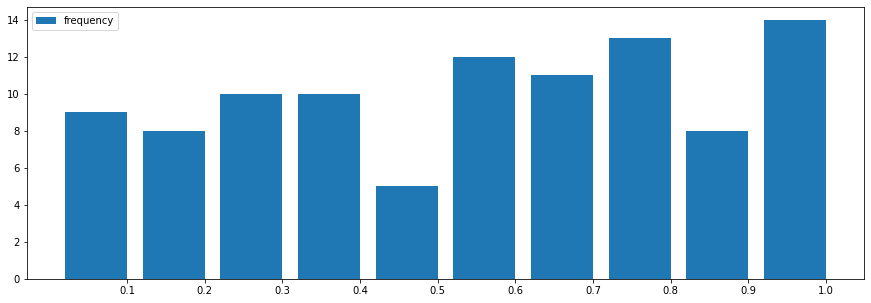

expected_value 0.5313554757630162 dispersion 0.08597217484987858
reference frequency 0.1
intervals frequence [0.09 0.08 0.1  0.1  0.05 0.12 0.11 0.13 0.08 0.14]
correlation 1.0

n = 100


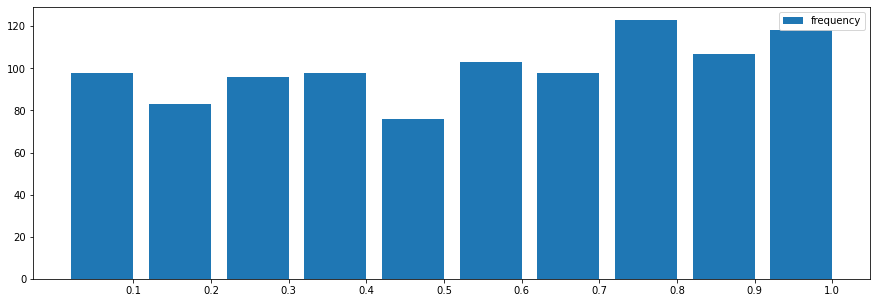

expected_value 0.5236102150537634 dispersion 0.08619338876604238
reference frequency 0.1
intervals frequence [0.098 0.083 0.096 0.098 0.076 0.103 0.098 0.123 0.107 0.118]
correlation 1.0

n = 1000


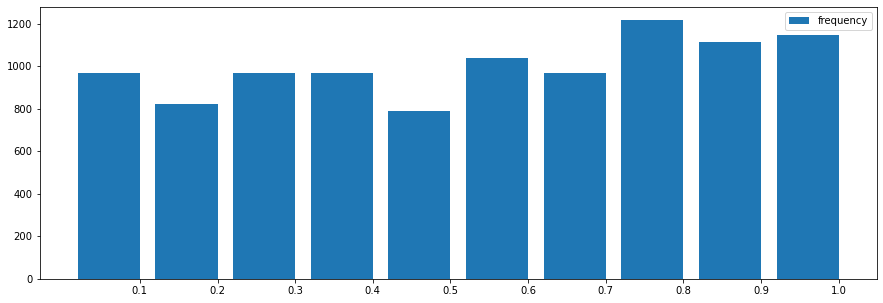

expected_value 0.5237318996415772 dispersion 0.08547817519764639
reference frequency 0.1
intervals frequence [0.0968 0.0824 0.0969 0.0967 0.0791 0.1037 0.0969 0.1217 0.1111 0.1147]
correlation 1.0


In [15]:
n = 10
for i in range(5):
    print("\nn =", n)
    n = np.power(10, i)
    mm_arr = multiplicativeCongruentMethod(n)
    lab1(n, mm_arr)

### As we can see, expected value and dispersion are pterry close to what we expected

---

Lets do the same thing with *Middle Square Method*


n = 10


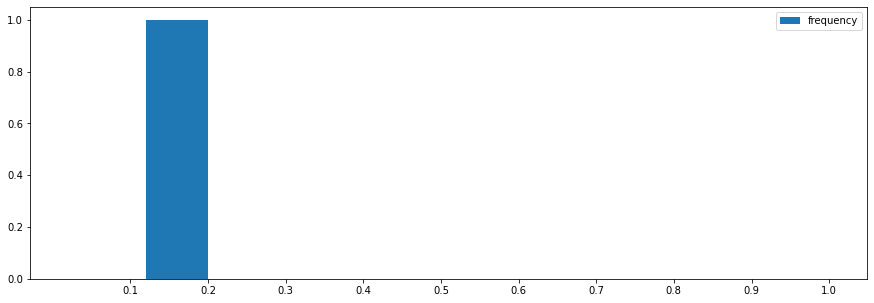

expected_value 0.1652 dispersion 0.0
reference frequency 0.1
intervals frequence [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
correlation nan

n = 1


C:\Program Files\Anaconda\envs\ML_book_OR\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


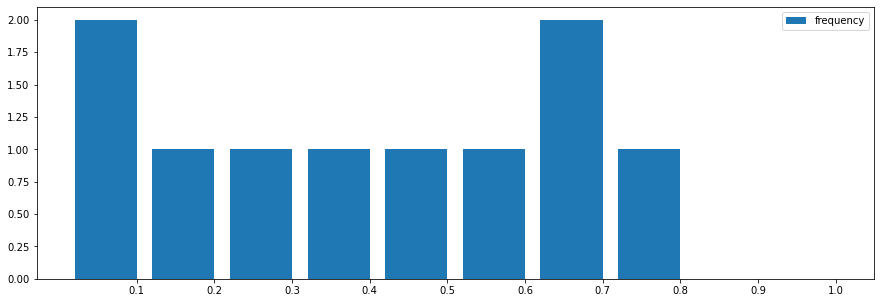

expected_value 0.47733000000000003 dispersion 0.07235699609999999
reference frequency 0.1
intervals frequence [0.2 0.1 0.1 0.1 0.1 0.1 0.2 0.1 0.  0. ]
correlation 1.0

n = 10


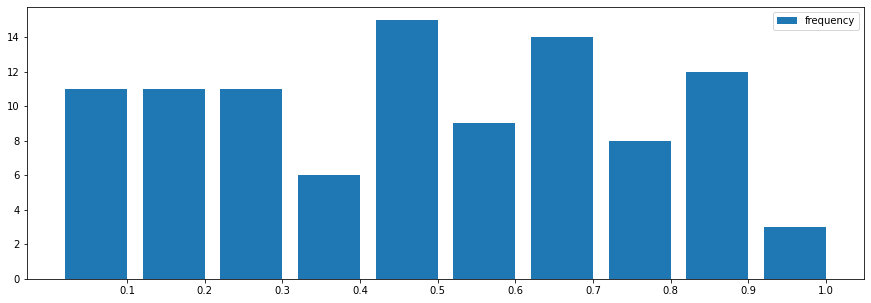

expected_value 0.46084 dispersion 0.0723369214
reference frequency 0.1
intervals frequence [0.11 0.11 0.11 0.06 0.15 0.09 0.14 0.08 0.12 0.03]
correlation 1.0

n = 100


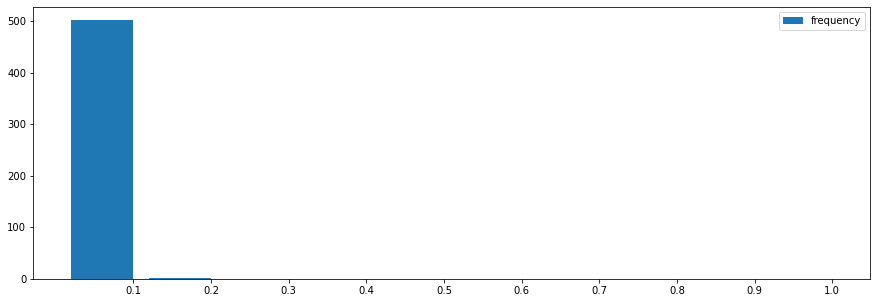

expected_value 0.0004203000000000001 dispersion 0.00016002691790999987
reference frequency 0.1
intervals frequence [0.502 0.001 0.    0.    0.    0.    0.    0.    0.    0.   ]
correlation 1.0


In [16]:
n = 10
for i in range(4):
    print("\nn =", n)
    n = np.power(10, i)
    msm_arr = middleSquareMethod(n)
    lab1(n, msm_arr)

As far as I concern, Middle Square Method didn't work out so well. Metrics look promising in the beginning while n is low. On the same time, with growth of n data generation turn out is strongly unbalanced and dispersion became too small